## Retreat _선형 회귀 예제

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [1]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [2]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

## 키와 몸무게를 한세트으로  데이터로 주고 키를 입력을 주었을떄 몸무게를 예측해보기 

In [15]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg= linear_model.LinearRegression()

# x는 2차원 array형태여야 해서 [[]]으로 넣어줬다
x= [[174],[152],[171],[180],[150],[165],[186],[155],[178]] 
y= [71,55,66,76,48,63,80,57,71]

reg.fit(x,y) #학습 시키기

LinearRegression()

[59.02326147]


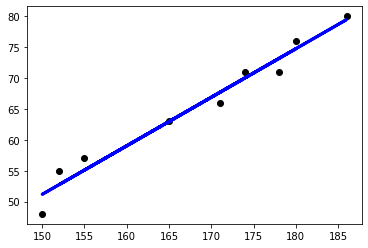

In [16]:
print(reg.predict([[160]])) #160인 몸무게 예측

# scatter 키와 몸무게를 그래프에서 점으로 표시한다.
plt.scatter(x,y,color='black') 

y_pred= reg.predict(x) # x값 예측   

plt.plot(x,y_pred, color='blue',linewidth=3)

## 당료병 예제
> • sklearn 라이브러리에는 당뇨병 환자들의 데이터가 기본
적으로 포함되어 있다.

In [12]:
import matplotlib.pylab as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

#당뇨병 데이터 적재
diabats =datasets.load_diabetes()
# 학습 데이터와 테스트 데이터 분라

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(diabats.data, diabats.target, test_size=0.2, random_state=0)


# 선형 회귀모델로 학습을 수행

model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

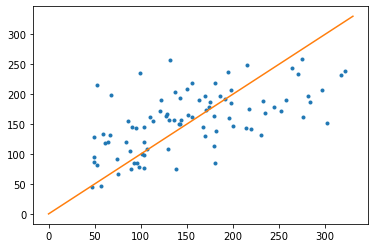

In [14]:
#테스트 데이터로 예측
y_pred = model.predict(x_test)

#실제 데이터와 예측 데이터 를 비교
plt.plot(y_test,y_pred,'.')
# 직선을 그리기 위한 선형 데이터 생성
x= np.linspace(0,330,100)
y=x
plt.plot(x,y)
plt.show()

## LinearRegression 이용한 보스턴 주택가격 예측

![This is a alt text.]('/ML_보스턴 데이터 컬럼 설명.png')

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston data set load
boston = load_boston()

# boston data set DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의  target array는 주택 가격, PRICE column으로 DataFrame에 존재
bostonDF['PRICE'] = boston.target 
# boston.target 안에  가격 array가 들어 있다.

print(bostonDF.shape)
bostonDF.head()

(506, 14)


C:\Users\82105\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



####  피처/타겟값 상관관계 파악 - seaborn의 regplot 이용하면 산점도와 선형 회귀 직선을 함께 나타내준다.

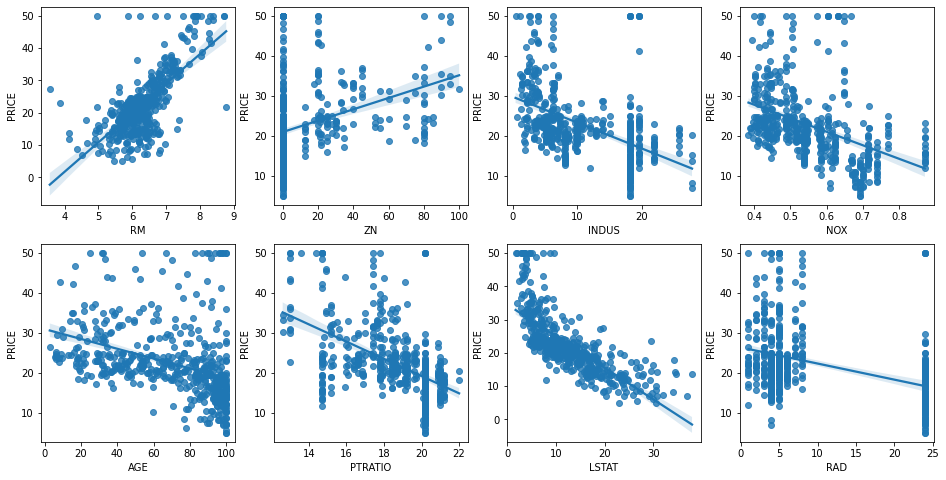

In [38]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax = axs[row][col])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
y_target= bostonDF['PRICE']
X_data= bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test, y_train, y_test= train_test_split(X_data,y_target,test_size=0.2,random_state=156)


#LinearRegression OLS로 학습 예측 평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('mse: {0:.3f} rmse{1:.3F}'.format(mse, rmse))
print('variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

mse: 18.140 rmse4.259
variance score : 0.785


In [26]:
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 39.290510119452314
회귀 계수 값: [ -0.1   0.1   0.    2.8 -20.1   3.4   0.   -1.6   0.3  -0.   -0.9   0.
  -0.5]


회귀 계수 (모델에 영향을 끼치는 정도)가 큰 순서대로 정렬

In [33]:
#시리즈로 생성, INDEX가 컬럼명이 유의
coeff= pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

#nox가 공기질이 영향력 크다 

RM          3.4
CHAS        2.8
RAD         0.3
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.6
NOX       -20.1
dtype: float64

In [35]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### k겹 셋으로 교차 검증을 통해 mse rmse 구하기/

In [40]:
from sklearn.model_selection import cross_val_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()
neg_mse_socres=cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores= np.sqrt(-1 * neg_mse_socres)
avg_rmse=np.mean(rmse_scores)


print('k겹 의 개별 negative mse socres:',np.round(neg_mse_socres,2))
print('k겹의 개별 rmse scores: ',np.round(rmse_scores,2))
print('k겹의 평균 rmse:{0:3f}',format(avg_rmse))

k겹 의 개별 negative mse socres: [-12.46 -26.05 -33.07 -80.76 -33.31]
k겹의 개별 rmse scores:  [3.53 5.1  5.75 8.99 5.77]
k겹의 평균 rmse:{0:3f} 5.828658946215802
